#Problem Statement

Kekhawatiran adanya keterlambatan pembayaran kartu kredit pada FinanKu yang akan merugikan bisnis.
Sehingga orang-orang yang memiliki potensi untuk mengalami keterlambatan bayar bisa diprediksi lebih cepat untuk menentukan strategi yang sesuai dalam menghadapi kondisi di masa mendatang.

#Objective

Membuat sebuah model yang dapat memprediksi setidaknya 60% dari pelanggan yang akan mengalami telat bayar kartu kredit [Accuracy & Recall di atas 60%]

#Variabel yang Tersedia

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---


**1. Customer ID:** Unique ID Customer\
**2. Branch:** Lokasi Cabang Nasabah Terdaftar\
**3. City:** Lokasi Kota Nasabah Terdaftar\
**4. Age:** Umur Nasabah Pada Periode Observasi\
**5. Avg. Annual Income/Month:** Rata-rata penghasilan nasabah dalam satu tahun\
**6. Balance (Q1-Q4):** Saldo mengendap yang dimiliki nasabah di akhir kuartal\
**7. Num of Products (Q1-Q4):** Jumlah kepemilikan produk nasabah di akhir kuartal\
**8. HasCrCard (Q1-Q4):** Status kepemilikan produk kartu kredit nasabah di akhir kuartal\
**9. Active Member (Q1-Q4):** Status keaktifan nasabah\
**10. Unpaid Tagging:** Status nasabah gagal bayar


#Experiment

Periode Tinjauan:
1. Nasabah direview selama satu tahun terakhir
2. Nasabah direview selama 6 bulan terakhir

Penyesuaian Variabel:
1. Balance dilihat dari rata-rata selama horizon waktu & dilihat perubahan pada akhir tinjauan dan awal tinjauan
2. Melihat kepemilikan jumlah produk dari rata-rata, maksimum, dan minimum pada periode tinjauan
3. Status keaktifan nasabah dilihat dalam bentuk bulan

In [3]:
# Pustaka untuk membantu dalam proses machine learning, terutama
# dalam pemilihan fitur dan turning hyperparameter
!pip install jcopml

In [4]:
#Library untuk Data Manipulasi
import pandas as pd
import numpy as np

#Library untuk Data Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk Model Machine Learning
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Library untuk Evaluasi Model
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Library untuk Feature Selection
from jcopml.feature_importance import mean_score_decrease

In [5]:
# Menampilkan semua kolom dalam DataFrame pandas tanpa terpotong
pd.set_option('display.max_columns', None)

Secara default, pandas membatasi jumlah kolom yang ditampilkan dalam output, terutama jika jumlah kolom cukup banyak.

#Data for Predicion

In [6]:
# Terdapat 2 dataset
# Path_1 berisi link dataset utama
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20All.csv"
# Path_2 berisi link dataset validasi
path_2 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20Validasi.csv"
df_all = pd.read_csv(path_1)
df_val = pd.read_csv(path_2)

## Import Data Path_1

Dataset untuk Eksperimen 1

In [7]:
# Mengampilkan 5 dataset teratas
df1 = pd.read_csv(path_1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Dataset untuk Eksperimen 2

In [8]:
# Memanggil 5 Dataset teratas
df2 = pd.read_csv(path_1)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


#Data Understanding

##Sebaran Nasabah Berdasarkan Lokasi

Sebaran Nasabah Berdasarkan Lokasi

 - Sebaran Keseluruhan
 - Sebaran Nasabah Gagal Bayar

In [9]:
# Sebaran Nasabah Secara keseluruhan
data1 = pd.DataFrame(\
                     #Mengelompokkan Berdasarkan Kota
                     df_all.groupby(by=["City"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name= 'sebaran Nasabah Berdasarkan Lokasi')
                     )

data1

,City,sebaran Nasabah Berdasarkan Lokasi
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


- Berdasarkan data, mayoritas nasabah FinanKu dari Surabaya (3767). Ini menunjukkan bahwa strategi bisnis dan mitigasi risiko keterlambatan pembayaran dapat lebih difokuskan pada kota dengan jumlah nasabah terbanyak.

In [10]:
# Sebaran nasabah gagal bayar berdasarkan kota
data2 = pd.DataFrame(\
                     #Mengelompokkan Berdasarkan Kota
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["City"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name = 'Sebaran nasabah gagal bayar berdasakan lokasi')
                     )

data2

,City,Sebaran nasabah gagal bayar berdasakan lokasi
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


Nasabah gagal bayar paling banyak berasal dari Surabaya (1.033 orang). Ini menunjukkan Surabaya memiliki risiko gagal bayar tertinggi, sehingga perlu strategi mitigasi khusus kota ini

##Sebaran Nasabah Berdasarkan Usia

Sebaran Nasabah Berdasarkan Usia
- Sebaran Keseluruhan
- Sebaran Nasabah Gagal Bayar

<Axes: title={'center': 'Sebaran Nasabah Berdasarkan Usia'}, xlabel='Age', ylabel='# People'>

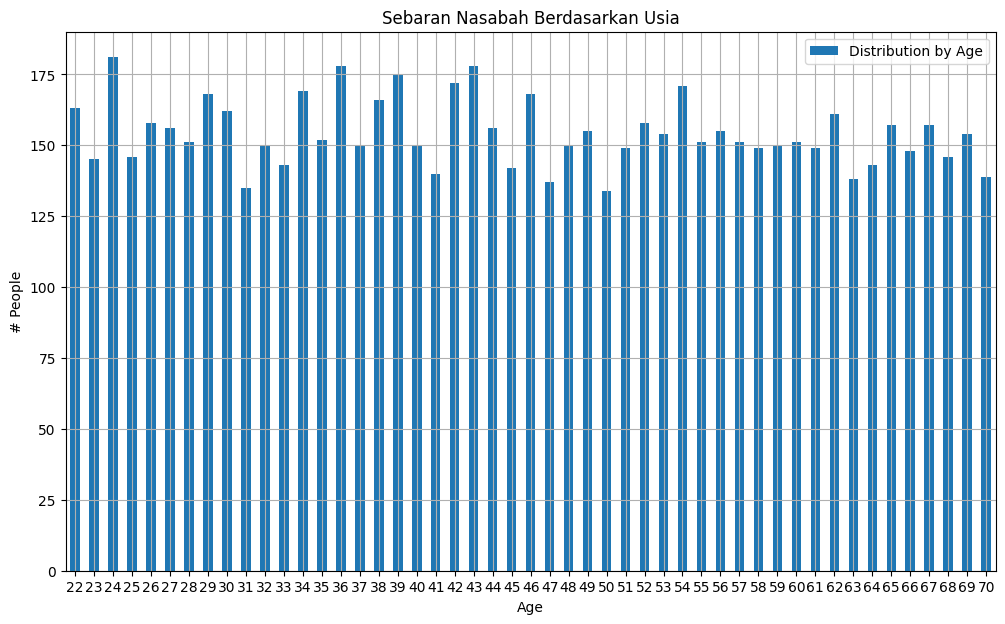

In [11]:
# Sebaran Nasabah Berdasarkan Usia
data3 = pd.DataFrame(\
                     #Mengkelompokkan Berdasarkan Umur
                     df_all.groupby(by=["Age"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mereset nama header
                     .reset_index(name='Distribution by Age'))

data3.sort_values(\
                  by=['Age'], \
                  ascending=True,\
                  inplace=True)

data3.plot(x='Age',
           y=['Distribution by Age'],
           kind='bar',
           grid = True,
           xlabel = 'Age',
           ylabel = '# People',
           figsize=(12,7),
           rot = 0,
           title = 'Sebaran Nasabah Berdasarkan Usia',
           table = False,
           secondary_y = False)

Sebaran nasabah berdasarkan usia cukup merata di rentang usia 22 hingga 70 tahun. Namun, terdapat beberapa usia dengan jumlah nasabah tertinggi, terutama di rantang 24 - 30 tahun dan 36 - 46 tahun. Menunjukkan bahwa kelompok usia tersebut lebih dominan dalam data, yang memungkinkan hubungan kebiasaan penggunaan kartu kredit atau tingkat pendapatan mereka

<Axes: title={'center': 'Sebaran Nasabah Gagal Bayar Berdasarkan usia'}, xlabel='Age', ylabel='#People'>

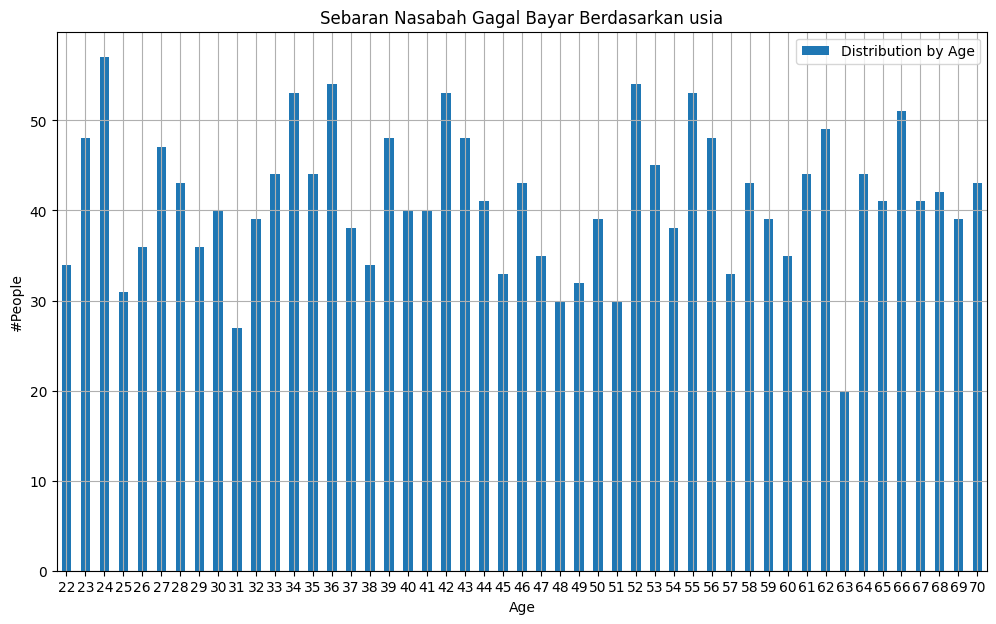

In [12]:
# Sebaran Nasabah Gagal Bayar Berdasarkan usia
data4 = pd.DataFrame(\
                     #Mengelompokkan Bedasarkan Umur
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["Age"])["Customer ID"]\
                     #Diagregatkan dengan menghitung jumlahnya (count)
                     .count()\
                     #Mereset nama header
                     .reset_index(name="Distribution by Age")
                     )

data4.sort_values(\
                  by = ['Age'],\
                  ascending = True,\
                  inplace = True
                  )

data4.plot(x='Age',
           y = ['Distribution by Age'],
           kind = 'bar',
           grid = True,
           xlabel = 'Age',
           ylabel = '#People',
           figsize = (12,7),
           rot = 0,
           title = 'Sebaran Nasabah Gagal Bayar Berdasarkan usia',
           table = False,
           secondary_y = False
           )

Nasabah yang gagal bayar tersebar di berbagai rentang usia, tetapi tampak ada puncak di beberapa kelompok usia tertentu, seperti usia 24, 34-36, 25, dan 55 tahun. Hal ini menunjukkan bahwa nasabah di rentang usia tersebut lebih beresiko mengalami keterlambatan pembayaran. Faktor seperti penghasilan, jumlah produk yang dimiliki, atau tingkat keaktifan nasabah bisa menjadi penyebabnya.

## Rata-rata Saldo Nasabah

Rata-rata Saldo Nasabah

In [13]:
df_checkbalance = df_all

In [14]:
# Menghitung total dan rata-rata saldo (Balance) nasabah dari empat quarta; (Q1 - Q4) dalam dataset

# Menghitung total Balance (Total Saldo selama 1 tahun)
df_checkbalance['Total_Balance'] = df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4']
#Rata-Rata Saldo Per quartal
df_checkbalance['Avg_Balance'] = (df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4'])/4

In [15]:
data5 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Total_Balance"]\
                     .mean()\
                     .reset_index(name="Rata-Rata Saldo Tahunan")
                     )
data5

,Unpaid Tagging,Rata-Rata Saldo Tahunan
0,0,1.985924e+08
1,1,2.527238e+08


- df_checkbalance.groupby(by =["Unpaid Tagging"]) = Data dikelompokkan berdasarkan status gagal bayar
- ["Total Balance"] = hanya kolom total balance yang akan dianalisis
- Menghitung rata-rata (mean) dari total dari setiap grup Unpaid Tagging
- .reset_index(name="Avg Annual Balance") = Indeks direset agar hasilnya menjadi DataFrame dan dinamai "Rata-Rata Saldo Tahunan"


OUTPUT
- Nasabah yang tidak gagal bayar (Unpaid tagging = 0) memiliki rata-rata saldo tahunan sebesar ~ 198,59 juta
- Nasabah yang gagal bayar (Unpaid Tagging = 0) memiliki rata-rata saldo tahunan sebesar ~ 252,72 juta
- Nasabah yang gagal bayar ternyata memiliki saldo tahunan lebih tinggi dibanding yang tidak gagal bayar
- Bisa jadi mereka memiliki limit kredit yang lebih besar atau transaksi keuangan yang lebih tinggi.

In [16]:
# Menghitung rata-rata saldo kuartalan berdasarkan status Unpaid Taging
data6 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg_Balance"]\
                     .mean()\
                     .reset_index(name='Rata-Rata Saldo Kuartalan')
                     )
data6

,Unpaid Tagging,Rata-Rata Saldo Kuartalan
0,0,4.964809e+07
1,1,6.318095e+07


OUTPUT
- Nasabah yang tidak gagal bayar (Unpaid tagging = 0) memiliki rata-rata saldo quartalan sebesar ~ 49,65 juta
- Nasabah yang gagal bayar (Unpaid Tagging = 0) memiliki rata-rata saldo quartalan sebesar ~ 63,2 juta
- Nasabah yang gagal bayar ternyata memiliki saldo quartalan lebih tinggi dibanding yang tidak gagal bayar
- Hal ini menunjukkan bahwa nasabah dengan saldo lebih besar justru memiliki kemungkinan gagal bayar, yang bisa jadi disebabkan oleh pola pengeluaran atau penggunaan kartu kredit yang lebih tinggi

## Rata-rata Kepemilikan Produk

In [17]:
# Menghitung rata-rata kepemilikan produk pernasabah selama 4 kuartal
df_checkbalance['Avg_Product'] = (df_checkbalance['NumOfProducts Q1'] + df_checkbalance['NumOfProducts Q2'] + df_checkbalance['NumOfProducts Q3'] + df_checkbalance['NumOfProducts Q4'])/4

Tujuannya untuk menganalisis apakah jumlah rata-rata produk yang dimiliki oleh nasabah berkorelasi dengan kemungkinan gagal bayar.

In [18]:
# Menghitung rata-rata produk kuartalan berdasarkan status Unpaid Taging
data7 = pd.DataFrame(\
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg_Product"]\
                     .mean()\
                     .reset_index(name='Rata-Rata Produk yang Dimiliki')
                     )

data7

,Unpaid Tagging,Rata-Rata Produk yang Dimiliki
0,0,1.667223
1,1,1.609336


OUTPUT
- Nasabah yang tidak gagal bayar (Unpaid tagging = 0) memiliki rata-rata produk ~ 1,67
- Nasabah yang gagal bayar (Unpaid Tagging = 0) memiliki rata-rata produk ~ 1,61
- Nasabah gagal bayar dan tidak gagal bayar memiliki rata-rata jumlah produk yang sama

#Data Preparation

## Pengecekan Data Duplikat dan Missing Data

In [19]:
df_all.duplicated().sum()

np.int64(0)

Tidak ada data duplikat, semua data unik

In [20]:
df_all.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


Tidak ada data Null, semua data terisi

##Penambahan Variabel Relevan

**Rata-rata Saldo & Perubahan Saldo Selama Periode Observasi**

Melihat saldo nasabah dalam scope observasi
1. Experiment 1: Rata-rata saldo nasabah dalam 1 tahun terakhir & Perubahan Saldo di Q4 terhadap Q1
2. Experiment 2: Rata-rata saldo nasabah dalam 6 bulan terakhir & Perubahan Saldo di Q4 terhadap Q2

#### Eksperimen 1

Eksperimen 1

In [21]:
#Rata-Rata Saldo nasabah dalam 1 tahun terakhir
df1['Mean Balance'] = (df1['Balance Q1'] + df1['Balance Q2'] + df1['Balance Q3'] + df1['Balance Q4'])/4
#Perubahan saldo di Q4 terhadap Q1
df1['Delta Balance'] = df1['Balance Q4'] - df1['Balance Q1']

In [22]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


- Nasabah 1 : Memiliki rata-rata tabungan pertahun sebesar 296759.045 dan perubahan saldo dari Q1 ke Q4 sebesar 1187036.18 (bertambah)
- Nasabah 2 : Memiliki rata-rata tabungan pertahun sebesar 0 dan perubahan saldo dari Q1 ke Q4 yaitu 0, yang artinya nasabah tidak mempunyai saldo ataupun memiliki akun pasif

#### Eksperimen 2

Eksperimen 2

In [23]:
#Rata-Rata Saldo Nasabah dalam 6 bulan terakhir
df2['Mean Balance'] = (df1['Balance Q3'] + df1['Balance Q4'])/2
#Perubahan Saldo Nasabah di Q4 terhadap Q2
df2['Delta Balance'] = df1['Balance Q4'] - df1['Balance Q2']

In [24]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68


- Nasabah 1 : Memiliki rata-rata tabungan per-6 bulan sebesar 593518.09 dan perubahan saldo dari Q2 ke Q4 sebesar 1187036.18 (bertambah)
- Nasabah 2 : Memiliki rata-rata tabungan pertahun sebesar 0 dan perubahan saldo dari Q2 ke Q4 yaitu 0, yang artinya nasabah tidak mempunyai saldo ataupun memiliki akun pasif

### Status Keaktifan

**Status Keaktifan**

Melihat periode nasabah aktif dalam scope observasi
1. Experiment 1 --> Keaktifan nasabah (dalam bulan) di 1 tahun terakhir
2. Experiment 2 --> Keaktifan nasabah (dalam bulan) di 6 bulan terakhir

#### Eksperimen 1

Kenapa dikali 3? Jadi apabila aktif di Quarter 1 dan quarter 2 artinya kan aktif selama 6 bulan, nah dua quarter dikali berapa biar hasilnya 6 yaitu dikali 3

aktif 2 kuarter -> 2 * 3 = 6 Bulan
aktif 4 kuarter -> 4 * 3 = 12 Bulan

In [25]:
df1['Active Months'] = (df1['ActiveMember Q1'] + df1['ActiveMember Q2'] + df1['ActiveMember Q3'] + df1['ActiveMember Q4'])*3

Kenapa akhirannya dikali 3, karena dalam 1 Quartal itu terdiri dari 3 bulan

In [26]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


1. Nasabah 1 : Hanya aktif di quartal 1 dan 4 = (1 + 0 + 0 + 1)*3 = (2)*3 = 6
2. Nasabah 2 : Hanya aktif di quartal 1 = (1+0+0+0)=(1)*3=3

#### Eksperimen 2

Kenapa dikali 3? Jadi apabila aktif di Quarter 1 dan quarter 2 artinya kan aktif selama 6 bulan, nah dua quarter dikali berapa biar hasilnya 6 yaitu dikali 3

aktif 2 kuarter -> 2 * 3 = 6 Bulan
aktif 4 kuarter -> 4 * 3 = 12 Bulan

In [27]:
# Keaktifan Nasabah dalam 6 bulan terakhir
df2['Active Months'] = (df2['ActiveMember Q3']+df2['ActiveMember Q4'])*3

In [28]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


### Penambahan/Pengurangan Product Holding

**Penambahan/Pengurangan Product Holding**

Melihat fluktuasi kepemilikan produk nasabah dalam periode observasi

#### Eksperimen 1

In [29]:
# Perubahan product holding selama 1 tahun
df1['Diff PH'] = df1['NumOfProducts Q4'] - df1['NumOfProducts Q1']

In [30]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


Dari nasabah 1 sampai nasabah 5, tidak ada perubahan kepemilikan produk nasabah

#### Eksperimen 2

In [31]:
#Perubahan produk holding nasabah selama 6 bulan terakhir
df2['Diff PH'] = df2['NumOfProducts Q4'] - df2['NumOfProducts Q2']

In [32]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0


Selama 6 bulan terakhir, nasabah 1 hingga nasabah 5 tidak ada perubahan kepemilikan produk holding

hasil Diff PH nya 0 itu artinya tidak ada penambahan ataupun pengurangan kepemilikan produk

###Lama Kepemilikan Kartu Kredit dalam Periode Observasi

In [33]:
def assign_cr1(df):
  if df['HasCrCard Q1'] == 1:
    return 12
  elif df['HasCrCard Q2'] == 1:
    return 9
  elif df['HasCrCard Q3'] == 1:
    return 6
  else:
    return 3
  return np.nan

####Eksperimen 1

In [34]:
# Dalam periode observasi selama satu tahun
df1['Vintage_CR'] = df1.apply(assign_cr1, axis=1)

In [35]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0,12


Nasabah 1 sampai 5 mempunyai kepemilikan kartu kredit selama 12 bulan (1 tahun)

####Eksperimen 2

In [36]:
#Dalam periode observasi selama 6 bulan
df2['Vintage_CR'] = df2.apply(assign_cr1, axis = 1)

In [37]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0,12


##Penghapusan Variabel

Status Kepemilikan Sudah Digantikan Dengan Lama Kepemilikan Kartu Kredit

In [38]:
df1 = df1.drop(columns = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4' ])
df2 = df2.drop(columns = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4' ])

Balance Per Quarter sudah digantikan dengan rata-rata saldo dalam periode observasi & selisih saldo di awal dan akhir periode observasi

In [39]:
df1 = df1.drop(columns = ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])
df2 = df2.drop(columns = ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])

Jumlah kepemilikan produk sudah digantikan dengan fluktuasi kepemilikan produk pada periode observasi

In [40]:
df1 = df1.drop(columns = ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4' ])
df2 = df2.drop(columns = ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4' ])

Status keaktifan nasabah per quarter sudah digantikan dengan status keaktifan dalam bulan

In [41]:
df1 = df1.drop(columns = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2 = df2.drop(columns = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

#Data Transformation

## Pemisahan Variabel Predictor

In [42]:
predictor1 = df1[df1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2 = df2[df2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

Memisahkan variabel predictor (fitur) dari dataset, dengan menghapus kolom yang tidak digunakan untuk prediksi.
- Mengambil semua kolom dari df1, kecuali kolom 'Customer ID' dan kolom 'Unpaid Tagging'
- **Customer ID** tidak relevan karena hanya sebagai identitas unik nasabah
- **Unpai Tagging** adalah target label (apakah nasabah telat bayar atau tidak), sehingga tidak boleh digunakan sebagai predictor
- **Ingat** kasus ini kita ingin memprediksi nasabah yang akan mengalami keterlambatan pembayaran kartu kredit

In [43]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [44]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,3,29,33000000,1001,Jakarta,1187036.18,0,593518.09,12
1,0,68,17000000,1005,Jakarta,0.00,0,0.00,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,675910.12,12
3,0,42,19000000,1008,Jakarta,0.00,0,0.00,12
4,6,43,29000000,1009,Jakarta,431190.68,0,555048.18,12


##Melakukan Encoding untuk Data Category

\
Variable Category:
1. Branch Code
2. City

Untuk branch code perlu diubah menjadi string agar dianggap sebagai data kategori

In [45]:
#Mengubah data menjadi ke tipe string
predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)

<ipython-input-45-4a5c849e4bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
<ipython-input-45-4a5c849e4bc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


In [46]:
predictor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [47]:
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [48]:
predictor1 = pd.get_dummies(predictor1)
predictor2 = pd.get_dummies(predictor2)

- pd.get_dummies() = Digunakan untuk melakukan One-Hot Encoding, yang berarti mengonversi kolom kategori menjadi beberapa kolom biner (0 atau 1)

In [49]:
# Mengonversi seluruh kolom dalam DataFrame menjadi tipe data Integer (kalau ada desimal, jadi bilangan bulat)
predictor1 = predictor1.astype(int)
predictor2 = predictor2.astype(int)

In [50]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036,0,296759,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,337955,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,277524,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,29,33000000,1187036,0,593518,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,675910,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,555048,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
#Menyimpan nama-nama dari setiap colom
predname = predictor1.columns
#Memisahkan hanya Data numerik
predname_num = predictor1.columns[0:7]
#Memisahkan hanya data Category
predname_cat = predictor1.columns[7:31]

In [53]:
predname

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [54]:
predname_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [55]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

Ini dilakukan untuk kolom mana yang nantinya akan kita masukkan sebagai kolom numerik dan mana kolom kategorik

In [56]:
X1_num = predictor1[predname_num]
X2_num = predictor2[predname_num]
X1_cat = predictor1[predname_cat]
X2_cat = predictor2[predname_cat]

###Standardisasi Data Numerik

Walaupun predname_num mempunyai sifat data yang sama yaitu numerik, namun antar kolom memiliki nilai data yang jauh

In [57]:
# Standarisasi menggunakan StandarScaler
# Mengubah data agar memiliki distribusi dengan mean 0 dan standar deviasi 1
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()

#Standarisasi X1_num
X1_num = pd.DataFrame(pt.fit_transform(X1_num))
X1_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


 - fit() = Menghitung rata-rata dan standar deviasi dari fitur dalam X1_num
 - transform() = Menggunakan informasi yang didapat dari fit() untuk mengubah data dalam X1_num sehingga setiap fitur memiliki rata-rata 0 dan standar deviasi 1

In [58]:
#Memanggil header kolom ke hasil standarisasi
X1_num.columns = predname_num
X1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [59]:
#Standarisasi X2_num
X2_num = pd.DataFrame(pt.fit_transform(X2_num))
X2_num.head()

,0,1,2,3,4,5,6
0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


In [60]:
#Memanggil header kolom ke hasil standarisasi
X2_num.columns = predname_num
X2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


##Menggabungkan Dataset Prediktor

In [61]:
#Menggabungkan dataset predictor
X1 = pd.concat([X1_cat, X1_num], axis=1)
X2 = pd.concat([X2_cat, X2_num], axis=1)

In [62]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [63]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


In [64]:
#Data variabel dependent
y1 = df1['Unpaid Tagging']
y2 = df2['Unpaid Tagging']

#Mempersiapkan Dataset untuk Validation

##Import Data Path_2

In [65]:
# Memanggil dataset
df1_val = pd.read_csv(path_2)
df2_val = pd.read_csv(path_2)

In [66]:
# Menampilkan 5 dataset teratas
df1_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


In [67]:
df2_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


##Menambah Variabel Relevan

Rata-rata Balance & Perubahan Saldo

In [68]:
#Rata-rata saldo nasabah selama 1 tahun dari data validasi
df1_val['Mean Balance'] = (df1_val['Balance Q2'] + df1_val['Balance Q3'] + df1_val['Balance Q4'] + df1_val['Balance Q5'])/4
#Rata-rata saldo nasabah selama 6 bulan terakhir dari data validasi
df2_val['Mean Balance'] = (df2_val['Balance Q4'] + df2_val['Balance Q5'])/2

In [69]:
#Perubahan saldo nasabah selama 1 tahun terakhir dari data validasi
df1_val['Delta Balance'] = df1_val['Balance Q5'] - df1_val['Balance Q2']
#Perubahan saldo nasabah selama 6 bulan terakhir dari data validasi
df2_val['Delta Balance'] = df2_val['Balance Q5'] - df2_val['Balance Q3']

##Status Keaktifan

In [70]:
df1_val['Active Months'] = (df1_val['ActiveMember Q2'] + df1_val['ActiveMember Q3'] + df1_val['ActiveMember Q4'] + df1_val['ActiveMember Q5'])*3
df2_val['Active Months'] = (df2_val['ActiveMember Q4'] + df2_val['ActiveMember Q5'])*3

Dikali 3 karena setiap Quartal terdiri dari 3 bulan

##Penambahan/Pengurangan Product Holding

In [71]:
df1_val['Diff PH'] = df1_val['NumOfProducts Q5'] - df1_val['NumOfProducts Q2']
df2_val['Diff PH'] = df2_val['NumOfProducts Q5'] - df2_val['NumOfProducts Q3']

##Lama Kepemilikan Kartu Kredit

In [72]:
def assign_cr2(df):
  if df['HasCrCard Q2'] == 1:
    return 12
  elif df['HasCrCard Q3'] == 1:
    return 9
  elif df['HasCrCard Q4'] == 1:
    return 6
  else:
    return 3
  return np.nan

In [73]:
df1_val['Vintage_CR'] = df1_val.apply(assign_cr2, axis=1)
df2_val['Vintage_CR'] = df2_val.apply(assign_cr2, axis=1)

##Penghapusan Variabel

In [74]:
df1_val = df1_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2_val = df2_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [75]:
#Menampilkan 10 data teratas
df1_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


In [76]:
df2_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,1.246388e+06,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,1.487002e+06,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,4.311907e+05,-2.477150e+05,3,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.990946e+07,1.338732e+07,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.370369e+08,5.481477e+07,3,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,0.000000e+00,0,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.535666e+07,1.191023e+07,3,0,6


##Pemilihan Variabel Predictor

In [77]:
#Memisahkan kolom yang menjadi variabel predictor, kolom Customer ID dan Unpaid Tagging tidak diikutsertakan
predictor1_val = df1_val[df1_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2_val = df2_val[df2_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [78]:
#Mengubah data menjadi tipe string
predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)

<ipython-input-78-c3bf2bef1eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
<ipython-input-78-c3bf2bef1eb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)


In [79]:
predictor1_val = pd.get_dummies(predictor1_val)
predictor2_val = pd.get_dummies(predictor2_val)

- pd.get_dummies() = Digunakan untuk melakukan One-Hot Encoding, yang berarti mengonversi kolom kategori menjadi beberapa kolom biner (0 atau 1)

In [80]:
#Mengubah seluruh data menjadi data yang bertipe Integer
predictor1_val = predictor1.astype(int)
predictor2_val = predictor2.astype(int)

In [81]:
predictor1_val.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036,0,296759,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,337955,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,277524,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [82]:
predictor2_val.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,29,33000000,1187036,0,593518,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,675910,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,555048,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
# Memisahkan kolom numerik dan kolom kategori
X1_num_val = predictor1_val[predname_num]
X2_num_val = predictor2_val[predname_num]
X1_cat_val = predictor1_val[predname_cat]
X2_cat_val = predictor2_val[predname_cat]

In [84]:
#Melakukan standarisasi DataFrame pada X1_num
X1_num_val = pd.DataFrame(pt.fit_transform(X1_num_val))
#Memanggil header kolom ke hasil standarisasi
X1_num_val.columns = predname_num

#Melakukan standarisasi DataFrame pada X2_num
X2_num_val = pd.DataFrame(pt.fit_transform(X2_num_val))
#Memanggil header kolom ke hasil standarisasi
X2_num_val.columns = predname_num

In [85]:
#Menggabungkan kembali kolom Category dengan kolom numerik yang sudah distandarisasi
X1_val = pd.concat([X1_cat_val, X1_num_val], axis=1)
X2_val = pd.concat([X2_cat_val, X2_num_val], axis=1)

In [86]:
X1_val.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [87]:
X2_val.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


In [88]:
#Data Variabel Dependent
y1_val = df1_val['Unpaid Tagging']
y2_val = df2_val['Unpaid Tagging']

#Pengecekan Korelasi

Variabel yang berkorelasi lebih dari 0.7 akan di drop

In [89]:
corrtest1 = X1.corr().abs()
corrtest2 = X2.corr().abs()

In [90]:
corrtest1

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [91]:
corrtest2

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.007562,0.010394,0.003603,0.010657,0.002625,0.009749,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.011636,0.006371,0.016078,0.001174,0.000411,0.005640,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.011636,0.013724,0.001937,0.016142,0.007450,0.001736,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.007556,0.008420,0.002095,0.023383,0.007340,0.013205,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.009181,0.001335,0.008829,0.010614,0.003334,0.007493,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.002050,0.004534,0.007488,0.007557,0.002061,0.004017,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.013401,0.011408,0.024003,0.002299,0.018009,0.006425,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.005226,0.005992,0.000678,0.009595,0.012922,0.001792,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002926,0.002933,0.012510,0.002003,0.022414,0.005889,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.002436,0.011252,0.016018,0.021118,0.012993,0.005449,0.020666


Mengambil nilai segitiga atas saja

In [92]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
X1 = X1.drop(to_drop, axis=1)
X1_val = X1_val.drop(to_drop, axis=1)

In [93]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [94]:
# Membuang Nilai Redundan Pada Matriks
upper2 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
X2 = X2.drop(to_drop2, axis=1)
X2_val = X2_val.drop(to_drop2, axis=1)

In [95]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


#Splitting Train-Test Data

y itu dari data variabel dependen

In [96]:
y1.value_counts()

,count
Unpaid Tagging,
0,5542
1,2019


In [97]:
y2.value_counts()

,count
Unpaid Tagging,
0,5542
1,2019


In [98]:
from sklearn.model_selection import train_test_split

#0.3 = 30% jadi data test, 70% jadi data training
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=30)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=30)

#Modeling

Pembangunan model akan menggunakan 3 algoritma:
1. Logistic Regression
2. Gradient Boosting
3. Random Forest

##Logistic Regression

**Logistik Regresi** adalah salah satu metode statistik yang digunakan untuk klasifikasi dalam machine learning, yang bertujuan untuk memprediksi probabilitas suatu kejadian dengan **output biner** (dua kelas) seperti 0 atau 1, Ya atau Tidak, Sukses atau Gagal. Meskipun namanya mengandung kata "regresi", logistik regresi sebenarnya digunakan untuk masalah klasifikasi, bukan regresi.

**Melakukan Definisi Hyperparameter**

Proses untuk mencari set hyperparameter terbaik untuk model machine learning agar mencapai performa yang optimal

In [99]:
#Penalty : menentukan jenis regularisasi yang digunakan dalam Regresi logistik
#12 : Regulasi Ridge, yang menambahkan penalti pada besarnya koefisien model. Disini hanya 12 yang dipilih, namun bisa juga ada opsi lain seperti l1 (Lasso)
penalty = ['l2']

#tol : parameter yang mengontrol toleransi untuk konvergensi optimasi model
#nilai yang kecil (misalnya 0.00001) memberikan toleransi yang lebih ketat dan mengharuskan model untuk berhati-hati dalam mencari solusi terbaik, tetapi bisa memperlambat proses pelatihan
tol = [0.001, 0.0001, 0.00001]

#C : parameter regulasi yang digunakan untuk mengontrol kekuatan regulasi
#Nilai besaran C mengurangi regularisasi, memungkinkan model lebih bebas untuk menyesuaikan data. Nilai kecil dari C meningkatkan regularisasi yang mencegah overfitting
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]

#fit_intercept : menentukan apakah model akan menghitung intercepat (bias) atau tidak
#Jika True, model akan menghitung intercept. Jika False, model akan mengasumsikan data sudah terpusat di sekitar nol dan tidak menghitung intercept
fit_intercept = [True, False]

#intercept_scaling : hanya jika digunakan jika fit_intercept=True
#Mengontrol skala untuk intercept, dan membantu menyesuaikan seberapa besar kontribusi intercept terhadap model
intercept_scaling = [1.0, 0.75, 0.5, 0.25]

#class_weight : Mengatur bagaimana penyesuaian bobot dilakukan untuk keseimbangan kelas
#balanced : akan memberikan bobot lebih pada kelas minoritas
#None : akan memberikan bobot yang sama untuk setiap kelas
class_weight = ['balanced', None]

#Solver : menentukan algoritma optimasi yang digunakan untuk menemukan koefisien model
#newton_cg : Metode optimasi berbasis Metode Newton untuk model besar
# sag dan saga : Metode Stochastic Average Gradient, cocok untuk dataset besar
# lbfgs : Metode Quasi-Newton yang lebih cocok untuk masalah dengan jumlah fitur banyak
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']

#Jumlah iterasi maksimum
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling,
                  class_weight=class_weight, solver=solver, max_iter=max_iter)

Parameter inilah yang akan dikombinasikan untuk mencari model terbaik

Melakukan Pencarian Hyperparameter Terbaik

In [100]:
from sklearn.model_selection import GridSearchCV

### Eksperimen 1

In [101]:
import time

#cv = cross validation
# Mode regresi yang akan digunakan
logreg = LogisticRegression()

#Membuat objek GridSearchCV yang akan digunakan untuk melakukan pencarian hyperparameter terbaik pada model regresi logistik
#estimator : menggunakan regresi logistik
#param_grid : menggunakan param_distribution pada hyperparameter di atas
#Scoring='recall' : Menentukan metrik evaluasi yang digunakan untuk menilai preforma model pada setiap kombinasi parameter
# cv = 5 : mengindikasikan penggunaan 5-fol cross-validation untuk mmebagi data menjadi 5 bagian dan melakukan validasi silang
#n-jobs = -1 : mengintruksikan semua core CPU yang tersedia untuk pencarian grid secara paralel
grid = GridSearchCV(estimator=logreg, param_grid = param_distributions , scoring = 'recall', cv = 5, n_jobs=-1)

#menyimpan waktu saat ini untuk mengukur waktu yang dibutuhkan untuk menjalankan pencarian grid
start_time = time.time()

#Menjalankan proses GridSearchCV pada data pelatihan
grid_result = grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.418269 using {'C': 10.0, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 0.5, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}
Execution time: 1052.5273222923279 s


- Best Score : 0.417563 adalah skor terbaik yang ditemukan selama pencarian grid, menggunakan metrik **recall** yang telah ditentukan sebelumnya.
- Skor 0.417563 berarti model berhasil mengidentifikasi **41,76%** dari semua kasus positif dengan baik, tetapi masih ada banyak ruang untuk perbaikan
- C = 100 : mengindikasikan bahwa regularisasi C cukup kecil (lebih sedikit regularisasinya)
- class_weight = balanced : memberikan bobot lebih pada kelas minoritas, yang seringkali penting jika ada ketidakseimbangan kelas dalam dataset
- fit_intercept = True : Model menghitung intercept (bias)
- solver = 'sag' : Solver SAG (Stochastic Average Gradient) digunakan, yang lebih efisien untuk dataset besar
- tol = 0.001 : toleransi untuk konvergensi. Model dihentikan jika perubahannya lebih kecil dari nilai ini

###Eksperimen 2

In [102]:
grid2 = GridSearchCV(estimator=logreg, param_grid=param_distributions, scoring='recall', cv=5, n_jobs=-1)
start_time = time.time()
grid_result2 = grid2.fit(X2_train, y2_train)
#Summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.395622 using {'C': 100.0, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Execution time: 1010.9987394809723 s


- Best Score : 0.395622 adalah skor terbaik yang ditemukan selama pencarian grid, menggunakan metrik **recall** yang telah ditentukan sebelumnya.
- Skor 0.395622 berarti model berhasil mengidentifikasi **39,56%** dari semua kasus positif dengan baik, tetapi masih ada banyak ruang untuk perbaikan
- C = 100 : mengindikasikan bahwa regularisasi C cukup kecil (lebih sedikit regularisasinya)
- class_weight = balanced : memberikan bobot lebih pada kelas minoritas, yang seringkali penting jika ada ketidakseimbangan kelas dalam dataset
- fit_intercept = False : Model tidak menghitung intercept (bias)
- solver = 'lbfgs' : Metode Quasi-Newton yang lebih cocok untuk masalah dengan jumlah fitur banyak
- tol = 0.001 : toleransi untuk konvergensi. Model dihentikan jika perubahannya lebih kecil dari nilai ini

##Gradient Boosting

**Gradient Boosting** adalah teknik *ensemble learning* yang digunakan untuk meningkatkan kinerja model prediksi, khususnya untuk tugas-tugas klasifikasi dan regresi. Teknik ini bekerja dengan menggabungkan beberapa model weak learners (model yang kinerjanya tidak terlalu baik jika digunakan sendiri) untuk membentuk model yang lebih kuat.

Model Gradient Boosing bekerja dengan cara bertahap, di mana model-model setelahnya memperbaiki kesalahan yang dilakukan oleh model-model sebelumnya. Proses ini melibatkan dua langkah utama : **Boosting** dan **Gradient Descent**.

In [103]:
!pip install -U scikit-learn
!pip install -U xgboost

  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.0
    Uninstalling xgboost-1.5.0:
      Successfully uninstalled xgboost-1.5.0


In [104]:
!pip install -U xgboost

In [105]:
import time
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

In [106]:
gbparameter = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

score = make_scorer(recall_score, average='binary')

**Gamma**: nilai minimal loss reduction yang dibutuhkan pada saat pemecahan cabang. Semakin besar nilai gamma yang ditetapkan, model yang dibangun akan lebih konservatif dan memungkinkan terjadinya underfitting.

**Learning_rate**: tingkat penyesuaian bobot fitur. Dalam pembangunan model, setiap iterasi menghasilkan bobot untuk fitur-fitur yang dimiliki. Learning_rate berguna untuk membantu menyusutkan nilai bobot tersebut agar model yang dibangun tidak mengalami overfitting.

**Scale_pos_weight**: pengaturan bobot antara kelas positif (churn) dengan kelas negatif (not churn). Hyperparameter ini sangat berguna ketika dataset yang digunakan merupakan imbalance datasets. Nilai yang biasa digunakan yaitu jumlah dari majority class dibagi dengan jumlah minority class.

###Eksperimen 1

In [117]:
GB_Grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder= False, eval_metric='logloss'),
    param_grid=gbparameter,
    cv=5,
    refit='recall',
    verbose=0,
    n_jobs=-1,
    scoring=score
)

- GridSearchCV : digunakan utnuk melakukan pencarian grid dengan cross-validation. Fungsinya untuk mencari kombinasi hyperparameter terbaik untuk model tertentu dengan cara melakukan evaluasi silang
- XGBClassifier adalah model XGBoost untuk klasifikasi
- use_label_encoder = FALSE : parameter untuk memastikan agar XGBoost tidak menggunakan label encoder internal yang telah ditinggalkan dalam versi baru
- eval_metric='logloss' : Menentukan evaluasi metric yang digunakan oleh XGBoost selama pelatihan. Dalam hal ini, metrik yang dipilih adalah **log loss**, yang sering digunakan dalam masalah klasifikasi
- param_grid : adalah parameter yang berisi kombinasi hyperparameter yang ingin dicoba selama pencarian grid
- gbparameter : dictionary yang berisi daftar nilai untuk setiap parameter yang akan diuji
- verbose = 0 : berarti tidak ada output yang akan ditampilkan selama pencarian

In [123]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

# Coba latih model secara langsung
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X1_train, y1_train)

# Prediksi dan evaluasi
y_pred = model.predict(X1_test)
print("Recall score:", recall_score(y1_test, y_pred))


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [ ]:
start_time = time.time()
GB_result = GB_Grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (GB_result.best_score_, GB_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

###Eksperimen 2

In [ ]:
GB_Grid2 = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
GB2_result = GB_Grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (GB2_result.best_score_, GB2_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

##Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
parameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators': [25,50,75,100,125], 'min_samples_split': [2,3,5,7]}
score = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)}

- **Max_depth**: jumlah maksimal pemecahan cabang atau level dalam satu pohon. Semakin besar nilai max_depth yang ditetapkan, model akan semakin presisi dalam menggolongkan data ke suatu kelas. Akan tetapi semakin besar nilai max_depth juga akan membuat model overfitting.

- **Max_features**: jumlah maksimal fitur yang dipertimbangkan ketika melakukan pemecahan cabang (splitting node). Sama halnya dengan max_depth¸ semakin banyak jumlah fitur yang dipertimbangkan dalam pemecahan cabang, akan semakin detail hasil yang didapatkan tetapi juga akan membuat model overfitting terhadap data trainingnya.

- **N_estimator**: jumlah pohon yang akan dibangun. Semakin banyak pohon, tingkat akurasi yang didapatkan menjadi lebih baik mengingat Random Forest menggunakan konsep majority vote dalam melakukan klasifikasi. Akan tetapi semakin banyak pohon yang dibangun, waktu komputasi yang dibutuhkan juga akan semakin tinggi.

- **Min_sample_split**: jumlah sampel data minimal pada sebuah internal node. Nilai yang besar dapat membuat model yang dibangun lebih konservatif. Akan tetapi, jika terlalu besar dapat menyebabkan model yang dibangun underfitting.

###Eksperimen 1

In [127]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

- RandomForestClassifier (), model yang akan digunakan adalah RandomForestClassifier
- parameter : Dictionary yang berisi hyperparameter untuk diuji, ada di atas
- cv=5 : Cross-validation 5 fold

In [128]:
start_time = time.time()
RF_result = RF_Grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (RF_result.best_score_, RF_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
273 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best: 0.321312 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 303.7020378112793 s


**Penjelasan Syntax**
- RF_Grid.fit() : akan mencoba berbagai kombinasi hyperparameter sesuai dictionary parameter yang telah didefinisikan sebelumnya
- GridSearchCV : akan memilih model dengan skor recall terbaik

**Output**
- Recall score terbaik = 0,3213 = 32,13%
-  n_estimator = 25 (jumlah pohon keputusan/decision tree). Model akan membangun 25 pohon keputusan
- maxdepth = 20 (setiap pohon dalam model tidak boleh memiliki kedalaman lebih dari 20 level)
- min_samples_split = 2 : Sebuah node hanya akan dibagi menjadi cabang baru jika ada minimal 2 sampel di dalamnya
- max_features = 'log2' : Menentukan jumlah fitur yang dipertimbangkan saat membagi (split) node dalam pohon keputusan.

###Eksperimen 2

In [129]:
RF_Grid2 = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [130]:
start_time = time.time()
RF_result2 = RF_Grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (RF_result2.best_score_, RF_result2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best: 0.320610 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 375.4929316043854 s


**Penjelasan Syntax**
- RF_Grid.fit() : akan mencoba berbagai kombinasi hyperparameter sesuai dictionary parameter yang telah didefinisikan sebelumnya
- GridSearchCV : akan memilih model dengan skor recall terbaik

**Output**
- Recall score terbaik = 0,3206 = 32,06%
-  n_estimator = 25 (jumlah pohon keputusan/decision tree). Model akan membangun 25 pohon keputusan
- maxdepth = 20 (setiap pohon dalam model tidak boleh memiliki kedalaman lebih dari 20 level)
- min_samples_split = 2 : Sebuah node hanya akan dibagi menjadi cabang baru jika ada minimal 2 sampel di dalamnya
- max_features = 'log2' : Menentukan jumlah fitur yang dipertimbangkan saat membagi (split) node dalam pohon keputusan.

#Evaluation Model

##Logistic Regression

###Eksperimen 1

In [131]:
y1_pred = grid.predict(X1_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [132]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print("Recall:", metrics.recall_score(y1_test, y1_pred))
metrics.completeness_score

Accuracy: 0.7765535478184222
Recall: 0.43564356435643564


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

**Output**
- Accuracy : Mengukur persentase prediksi yang benar dibandingkan dengan total data
- Recall : Mengukur seberapa baik model mendeteksi kelas positif 1

**Kesimpulan**
- Accuracy tinggi tetapi Recall rendah, berarti model gagal mendeteksi banyak kasus positif (gagal bayar)
- Model saat ini tidak cukup baik untuk mendeteksi keterlambatan pembayaran. Kita perlu meningkatkan recall agar lebih banyak kasus gagal bayar yang terdeteksi

In [133]:
y1_pred_val = grid.predict(X1_val)

In [134]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y1_val, y1_pred_val))
print("Recall:", metrics.recall_score(y1_val, y1_pred_val))

Accuracy: 0.6384076180399418
Recall: 0.262827611664821


In [135]:
#Variabel apa yang dianggap penting dalam membangun model ini
from jcopml.feature_importance import mean_score_decrease
df_imp1 = mean_score_decrease(X1_train, y1_train, grid, plot=True, topk=20)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Dari model logistic regression ini, variabel yang dianggap penting dalam menentukan dia akan gagal bayar atau tidak adalah Vintage_CR

###Eksperimen 2

In [136]:
y2_pred = grid2.predict(X2_test)

In [137]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y2_test, y2_pred))
print("Recall:", metrics.recall_score(y2_test, y2_pred))
metrics.completeness_score

Accuracy: 0.7584839136183341
Recall: 0.40924092409240925


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [138]:
y2_pred_val =grid2.predict(X2_val)

In [139]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y2_pred_val))
print("Recall:",metrics.recall_score(y2_val, y2_pred_val))
metrics.completeness_score

Accuracy: 0.6354979500066129
Recall: 0.24806201550387597


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

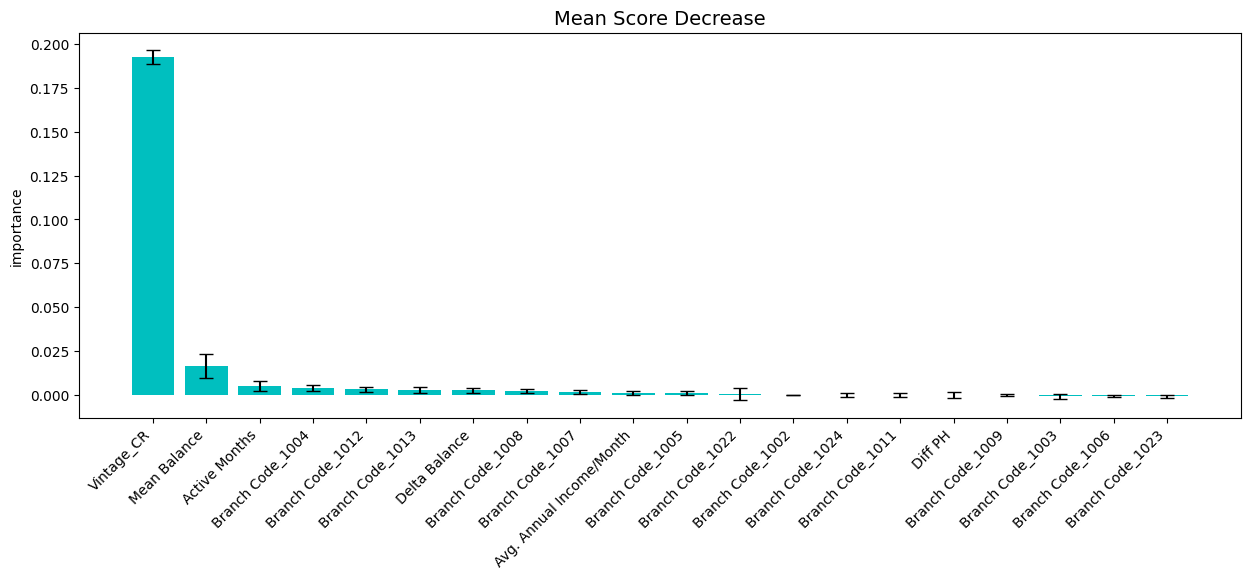

In [140]:
df_imp2 = mean_score_decrease(X2_train, y2_train, grid2, plot= True, topk=20)

##Gradient Boosting

###Eksperimen 1

In [141]:
y11_pred =GB_Grid.predict(X1_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y11_pred))
print("Recall:",metrics.recall_score(y1_test, y11_pred))
metrics.completeness_score

In [ ]:
y11_pred_val =GB_Grid.predict(X1_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y11_pred_val))
print("Recall:",metrics.recall_score(y1_val, y11_pred_val))
metrics.completeness_score

In [ ]:
df_imp3 = mean_score_decrease(X1_train, y1_train, GB_Grid, plot= True, topk=20)

###Eksperimen 2

In [ ]:
y22_pred =GB_Grid2.predict(X2_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y22_pred))
print("Recall:",metrics.recall_score(y2_test, y22_pred))
metrics.completeness_score

In [ ]:
y22_pred_val =GB_Grid2.predict(X2_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y22_pred_val))
print("Recall:",metrics.recall_score(y2_val, y22_pred_val))
metrics.completeness_score

In [ ]:
df_imp4 = mean_score_decrease(X2_train, y2_train, GB_Grid2, plot= True, topk=20)

##Random Forest

###Eksperimen 1

In [142]:
y12_pred =RF_Grid.predict(X1_test)

In [143]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y12_pred))
print("Recall:",metrics.recall_score(y1_test, y12_pred))
metrics.completeness_score

Accuracy: 0.8126928162185985
Recall: 0.33828382838283827


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [144]:
y12_pred_val =RF_Grid.predict(X1_val)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [145]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y12_pred_val))
print("Recall:",metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.702817087686814
Recall: 0.3359173126614987


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [146]:
df_imp5 = mean_score_decrease(X1_train, y1_train, RF_Grid, plot= True, topk=20)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

###Eksperimen 2

In [147]:
y21_pred =RF_Grid2.predict(X2_test)

In [148]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y21_pred))
print("Recall:",metrics.recall_score(y2_test, y21_pred))
metrics.completeness_score

Accuracy: 0.8074041427941825
Recall: 0.33828382838283827


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [149]:
y21_pred_val =RF_Grid2.predict(X2_val)

In [150]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y21_pred_val))
print("Recall:",metrics.recall_score(y2_val, y21_pred_val))
metrics.completeness_score

Accuracy: 0.7010977383943923
Recall: 0.33960871170173496


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

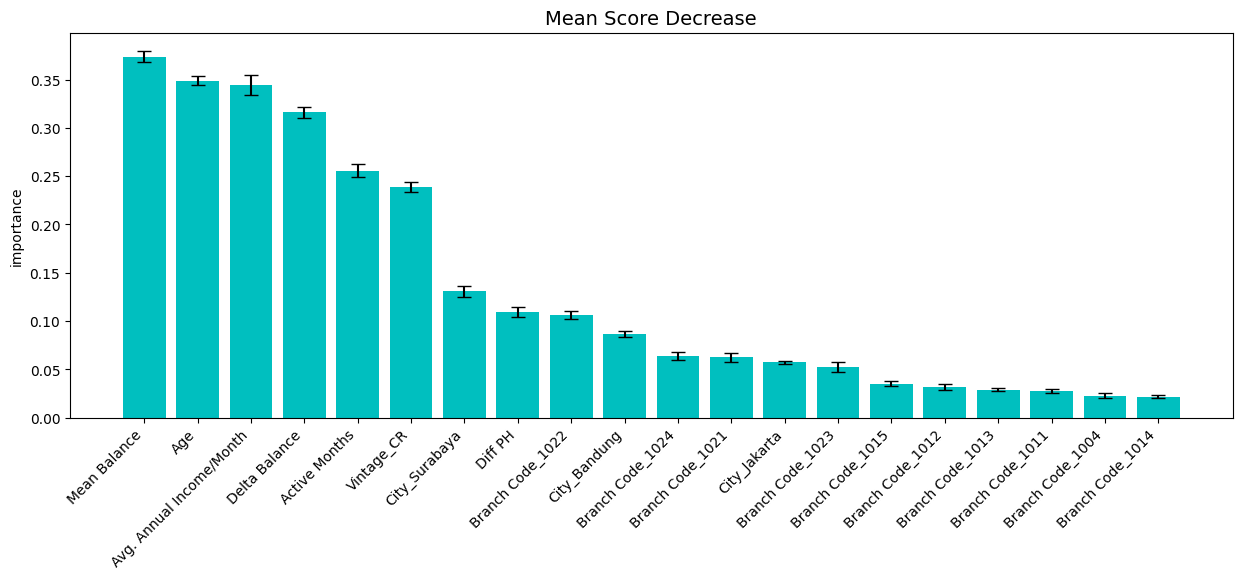

In [151]:
df_imp6 = mean_score_decrease(X2_train, y2_train, RF_Grid2, plot= True, topk=20)

#Kesimpulan

Dari semua model, rata-rata memiliki accuracy di atas 60% namun memiliki recall di bawah 40%. Artinya, masih banyak nasabah yang sebenarnya berpotensi gagal bayar namun diprediksi tidak akan gagal bayar. Sehingga bisa disampaikan bahwa dalam iterasi pembangunan model kali ini, objektif yang diinginkan masih belum dapat tercapai.

Solusi pengembangan kedepannya yang bisa dilakukan di antaranya:

1. Memperbanyak sample (jumlah nasabah dgn asumsi dataset yang tersedia saat ini bukan total populasi nasabah)
2. Melakukan oversampling terhadap kelas minoritas (gagal bayar) agar pembangunan model tidak bias
3. Memperluas horizon waktu
4. Mencoba variasi variabel lainnya (menambah variabel baru, atau membuang variabel yang memiliki nilai importance rendah pada hasil terakhir)
5. Mencoba memperluas kombinasi hyperparameter dalam pembangunan model
6. Mencoba algoritma supervised machine learning lainnya